<a href="https://colab.research.google.com/github/ncphung1405/bai-tap/blob/main/B%C3%A0i_t%E1%BA%ADp_t%C3%ACm_hi%E1%BB%83u_Pytorch_PHIHUNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Viết mô hình Linear Regession bằng Pytorch

In [19]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [20]:
# Tạo dữ liệu mẫu
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 5 * X.squeeze() + 10 + np.random.randn(100)



In [21]:
# Chuyển đổi dữ liệu thành Tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Định nghĩa mô hình Linear Regression
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)




In [22]:
# Khởi tạo mô hình và thiết lập các tham số
input_dim = X.shape[1]
output_dim = 1
model = LinearRegression(input_dim, output_dim)



In [23]:
# Định nghĩa hàm loss và bộ tối ưu
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)



In [24]:
# Huấn luyện mô hình
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass và cập nhật tham số
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [100/2000], Loss: 10.4275
Epoch [200/2000], Loss: 3.9695
Epoch [300/2000], Loss: 1.8464
Epoch [400/2000], Loss: 1.1484
Epoch [500/2000], Loss: 0.9190
Epoch [600/2000], Loss: 0.8435
Epoch [700/2000], Loss: 0.8187
Epoch [800/2000], Loss: 0.8106
Epoch [900/2000], Loss: 0.8079
Epoch [1000/2000], Loss: 0.8070
Epoch [1100/2000], Loss: 0.8067
Epoch [1200/2000], Loss: 0.8066
Epoch [1300/2000], Loss: 0.8066
Epoch [1400/2000], Loss: 0.8066
Epoch [1500/2000], Loss: 0.8066
Epoch [1600/2000], Loss: 0.8066
Epoch [1700/2000], Loss: 0.8066
Epoch [1800/2000], Loss: 0.8066
Epoch [1900/2000], Loss: 0.8066
Epoch [2000/2000], Loss: 0.8066


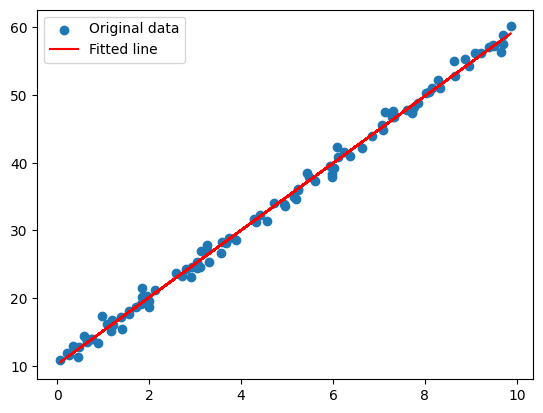

In [25]:
# Trực quan hóa kết quả
predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, label='Original data')
plt.plot(X, predicted, 'r-', label='Fitted line')
plt.legend()
plt.show()

3. Viết chương trình xử lý dữ liệu sau với Pytorch

In [26]:
# Dữ liệu đầu vào
X1 = torch.tensor([0, 0, 1, 1], dtype=torch.float32)
X2 = torch.tensor([0, 1, 0, 1], dtype=torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

In [27]:
# Tạo DataLoader cho dữ liệu
dataset = TensorDataset(X1.view(-1, 1), X2.view(-1, 1), y.view(-1, 1))
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [28]:
# Định nghĩa mô hình Logistic Regression
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)  # Một lớp tuyến tính với 2 đầu vào và 1 đầu ra

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))  # Sigmoid activation function
        return out

In [29]:
# Khởi tạo mô hình
model = LogisticRegression()

# Định nghĩa hàm loss và optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

In [30]:
# Huấn luyện mô hình
num_epochs = 1000
for epoch in range(num_epochs):
    for batch_X1, batch_X2, batch_y in dataloader:
        # Forward pass
        outputs = model(torch.cat([batch_X1, batch_X2], dim=1))
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.8170
Epoch [200/1000], Loss: 0.6680
Epoch [300/1000], Loss: 0.6662
Epoch [400/1000], Loss: 0.6153
Epoch [500/1000], Loss: 0.7859
Epoch [600/1000], Loss: 0.7782
Epoch [700/1000], Loss: 0.7713
Epoch [800/1000], Loss: 0.6733
Epoch [900/1000], Loss: 0.7591
Epoch [1000/1000], Loss: 0.7230


In [31]:
# Dự đoán cho dữ liệu mới
with torch.no_grad():
    new_data = torch.tensor([[1, 0], [0, 1], [1, 1], [0, 0]], dtype=torch.float32)
    predictions = model(new_data).round().squeeze().tolist()
    print("Predictions:", predictions)

Predictions: [1.0, 1.0, 0.0, 1.0]


2. Viết mô hình Lgistic Regession bằng Pytorch

In [32]:
# Dữ liệu mẫu
X_train = np.array([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0]])
y_train = np.array([0, 0, 1, 1])


In [33]:
# Chuyển đổi dữ liệu sang tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

In [34]:
# Định nghĩa mô hình Logistic Regression
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out


In [35]:
# Khởi tạo mô hình
input_size = X_train.shape[1]
model = LogisticRegression(input_size)

In [36]:
# Định nghĩa hàm loss và bộ tối ưu
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [37]:
# Huấn luyện mô hình
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # Backward pass và cập nhật trọng số
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.7049
Epoch [200/1000], Loss: 0.6708
Epoch [300/1000], Loss: 0.6394
Epoch [400/1000], Loss: 0.6104
Epoch [500/1000], Loss: 0.5836
Epoch [600/1000], Loss: 0.5589
Epoch [700/1000], Loss: 0.5362
Epoch [800/1000], Loss: 0.5151
Epoch [900/1000], Loss: 0.4957
Epoch [1000/1000], Loss: 0.4777


In [39]:
# Dự đoán trên dữ liệu huấn luyện
with torch.no_grad():
    predicted = model(X_train)
    predicted_cls = predicted.round()
    accuracy = (predicted_cls.eq(y_train.view_as(predicted_cls)).sum() / y_train.shape[0]).item()
    print(f'Độ chính xác của dữ liệu : {accuracy:.2f}')

Độ chính xác của dữ liệu : 0.75
